### Data Mining and Machine Learning

### Feature Selection in Supervised Classification

### Edgar Acuna

#### Febrero 2021

##### Use of modules: feature_selection from scikit-learn, skrebate, Orange and some functions from scikit- featue library form ASU 


In [137]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import math as m
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, SelectPercentile, f_classif, mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### I. Feature Selection by Visualization using boxplots
#### Example 1: Diabetes dataset

In [138]:
url= "http://academic.uprm.edu/eacuna/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names,header=None)
y=data['class']
X=data.iloc[:,0:8]

In [133]:
print(data.shape)
data.head()
#normalizando los datos
data1=data.drop('class',axis=1)
data1_norm=(data1 - data1.min()) / (data1.max() - data1.min())
data1_norm['class']=data['class']

(768, 9)


<Figure size 720x3600 with 0 Axes>

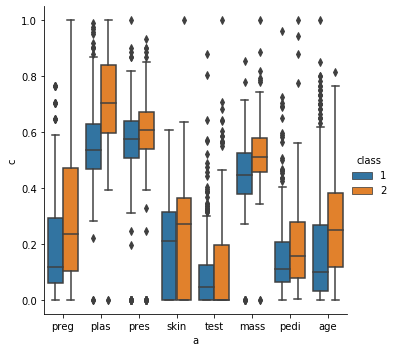

In [134]:
plt.figure(figsize=(10,50))
df_long = pd.melt(data1_norm, "class", var_name="a", value_name="c")
sns.factorplot("a", hue="class", y="c", data=df_long, kind="box")

Comment: From the boxplots we can see  that features: plas, age,preg,press and mass have boxplot not so overlaped

### II. Feature selection Statistical Meaasures
#### II-1. Chi-Square Test

It is desirable to have discretized attributes and two classes. I do not recommend 
to use this method because the Chi-Square test is approximated and it is not robust.

In [135]:
y=data['class']
X=data.iloc[:,0:8]

In [136]:
# Funcion auxiliar para discretizar cualquier columna de un dataframe
def disc_col_ew(df,str,k,out):
    df1=df[str]
    bins=np.linspace(df1.min(), df1.max(),k)
    if out=="num":
        df1=pd.cut(df1,bins=bins,include_lowest=True, right=True,labels=False)
    else:
        bins[0]=float('-inf')
        bins[k-1]=float('inf')
        df1=pd.cut(df1,bins=bins,include_lowest=True, right=True)  
    return df1
# funcion auxiliar para determinar el numero optimo de intervalos segun la formula de scott
def nclass_scott(x):
    h=3.5*(np.var(x,ddof=1)**.5)*len(x)**(-.3333)
    intervals=m.ceil((max(x)-min(x))/h)
    return int(intervals)

In [102]:
#Funcion para discretizar todas las colunmnas de un dataframe
def disc_ew(df,out):
    name=df.columns.tolist()
    disc=pd.DataFrame()
    for name in df.columns.tolist():
        k=nclass_scott(df[name])
        disc[name]=disc_col_ew(df,name,k,out)
    return disc

In [103]:
#discretizando las columnas de la matriz predictora X de diabetes
diab_disc=disc_ew(X,out="num")

In [104]:
#Choosing the best features with Chi-square and scikit-learn
y1=y.to_numpy()
X1=diab_disc.to_numpy()
test = SelectKBest(score_func=chi2, k=3)
fit = test.fit(X1, y1)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features= fit.transform(X1)
# Imprime los datos de las tres mejores features
print(features)

[105.387 120.206   2.87   10.086  59.232  42.746  62.639 115.924]
[[ 4 11  6]
 [ 0  6  2]
 [ 6 14  2]
 ...
 [ 3  9  1]
 [ 0 10  5]
 [ 0  7  0]]


Comentario: Las tres mejores variables con la prueba de Chi-square son plas, age y preg por tener el Chi-Square mas alto.

#### II-2. Using the F test   

Se puede usar la libreria sciki-learn o la libreria de la ASU

In [140]:
# Selecion  de Features usando los p-values de la F-test como score
# Aqui usamos scikit-learn y se selecciona el 30% de deatures con el mas alto score
selector = SelectPercentile(f_classif, percentile=30)
fit=selector.fit(X, y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
print(scores)
features= fit.transform(X)
# Imprime los datos de las tres mejores features
print(features)

[0.221 1.    0.027 0.034 0.084 0.378 0.14  0.253]
[[148.   33.6  50. ]
 [ 85.   26.6  31. ]
 [183.   23.3  32. ]
 ...
 [121.   26.2  30. ]
 [126.   30.1  47. ]
 [ 93.   30.4  23. ]]


Comentario: Las tres, mejores variables con la prueba de F son plas,mass y age

In [141]:
import numpy as np
from sklearn.feature_selection import f_classif


def f_score(X, y):
    """
    This function implements the anova f_value feature selection (existing method for classification in scikit-learn),
    where f_score = sum((ni/(c-1))*(mean_i - mean)^2)/((1/(n - c))*sum((ni-1)*std_i^2))
    Input
    -----
    X: {numpy array}, shape (n_samples, n_features)
        input data
    y : {numpy array},shape (n_samples,)
        input class labels
    Output
    ------
    F: {numpy array}, shape (n_features,)
        f-score for each feature
    """

    F, pval = f_classif(X, y)
    return F


def feature_ranking(F):
    """
    Rank features in descending order according to f-score, the higher the f-score, the more important the feature is
    """
    idx = np.argsort(F)
    return idx[::-1]

In [142]:
scoref =f_score(X, y)
idx = feature_ranking(scoref)
print(scoref,idx)

[ 39.67  213.162   3.257   4.304  13.281  71.772  23.871  46.141] [1 5 7 0 6 4 3 2]


Comentario: las tres variables mas importantes con la prueba de F son: plas,mass y age

### III- Using Information measures

#### Mutual Information (Entropia)

Using the scikit-learn module


In [143]:
# Univariate feature selection with Mutual Information
scores = mutual_info_classif(X,y)
scores /= scores.max()
print(scores)

[0.443 1.    0.142 0.173 0.395 0.556 0.088 0.54 ]


#### Comentario: Las tres variables usando el criterio de Mutual Information son: plas, mass y age

### IV-Using ReliefF to select the best features 

#### IV-I Using the skrebate module 

In [148]:
from skrebate import ReliefF

df=data.drop('class',axis=1)
#Normalizando las predictoras
df_norm=(df - df.min()) / (df.max() - df.min())
features, labels = df_norm.values, data['class'].values

In [149]:
fs = ReliefF(n_neighbors=10)
fs.fit(features, labels)
for feature_name, feature_score in zip(data.columns,fs.feature_importances_):
    print (feature_name, feature_score)

preg 0.011557904411764679
plas 0.027526957705192593
pres 0.005626707650273222
skin 0.012511837121212118
test 0.004258551270685579
mass 0.015538065076999513
pedi 0.007962389695417026
age 0.009900173611111106


Comentario: las tres variables mas importantes con el ReliefF son: plas,mass y skin

#### IV-2 Using the ReliefF function from the feature selection module form the ASU

In [150]:
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances


def reliefF(X, y, **kwargs):
    """
    This function implements the reliefF feature selection
    Input
    -----
    X: {numpy array}, shape (n_samples, n_features)
        input data
    y: {numpy array}, shape (n_samples,)
        input class labels
    kwargs: {dictionary}
        parameters of reliefF:
        k: {int}
            choices for the number of neighbors (default k = 5)
    Output
    ------
    score: {numpy array}, shape (n_features,)
        reliefF score for each feature
    Reference
    ---------
    Robnik-Sikonja, Marko et al. "Theoretical and empirical analysis of relieff and rrelieff." Machine Learning 2003.
    Zhao, Zheng et al. "On Similarity Preserving Feature Selection." TKDE 2013.
    """

    if "k" not in kwargs.keys():
        k = 5
    else:
        k = kwargs["k"]
    n_samples, n_features = X.shape

    # calculate pairwise distances between instances
    distance = pairwise_distances(X, metric='manhattan')

    score = np.zeros(n_features)

    # the number of sampled instances is equal to the number of total instances
    for idx in range(n_samples):
        near_hit = []
        near_miss = dict()

        self_fea = X[idx, :]
        c = np.unique(y).tolist()

        stop_dict = dict()
        for label in c:
            stop_dict[label] = 0
        del c[c.index(y[idx])]

        p_dict = dict()
        p_label_idx = float(len(y[y == y[idx]]))/float(n_samples)

        for label in c:
            p_label_c = float(len(y[y == label]))/float(n_samples)
            p_dict[label] = p_label_c/(1-p_label_idx)
            near_miss[label] = []

        distance_sort = []
        distance[idx, idx] = np.max(distance[idx, :])

        for i in range(n_samples):
            distance_sort.append([distance[idx, i], int(i), y[i]])
        distance_sort.sort(key=lambda x: x[0])

        for i in range(n_samples):
            # find k nearest hit points
            if distance_sort[i][2] == y[idx]:
                if len(near_hit) < k:
                    near_hit.append(distance_sort[i][1])
                elif len(near_hit) == k:
                    stop_dict[y[idx]] = 1
            else:
                # find k nearest miss points for each label
                if len(near_miss[distance_sort[i][2]]) < k:
                    near_miss[distance_sort[i][2]].append(distance_sort[i][1])
                else:
                    if len(near_miss[distance_sort[i][2]]) == k:
                        stop_dict[distance_sort[i][2]] = 1
            stop = True
            for (key, value) in stop_dict.items():
                    if value != 1:
                        stop = False
            if stop:
                break

        # update reliefF score
        near_hit_term = np.zeros(n_features)
        for ele in near_hit:
            near_hit_term = np.array(abs(self_fea-X[ele, :]))+np.array(near_hit_term)

        near_miss_term = dict()
        for (label, miss_list) in near_miss.items():
            near_miss_term[label] = np.zeros(n_features)
            for ele in miss_list:
                near_miss_term[label] = np.array(abs(self_fea-X[ele, :]))+np.array(near_miss_term[label])
            score += near_miss_term[label]/(k*p_dict[label])
        score -= near_hit_term/k
    return score


def feature_ranking(score):
    """
    Rank features in descending order according to reliefF score, the higher the reliefF score, the more important the
    feature is
    """
    idx = np.argsort(score, 0)
    return idx[::-1]


In [151]:
y1=y.to_numpy()
X1=X.to_numpy()
score_relief=reliefF(X1,y1)
feat=feature_ranking(score_relief)
print(score_relief,feat)

[ 230.6   2752.6    521.8    875.4   1389.8    674.06    20.236  891.6  ] [1 4 7 3 5 2 0 6]


 Comentario: las tres variables mas importantes con el RelieF son: plas, test y age
 

#### IV-3  Usando el Relief de Orange

In [113]:
import Orange
df = Orange.data.Table("https://academic.uprm.edu/eacuna/diabetes.tab")
#ReliefF usando 10 vecinos mas cercanos y  una muestrd m=100 para updating de los pesos
print('Feature scores for best  features (scored individually):')
meas =Orange.preprocess.score.ReliefF(n_iterations=400,k_nearest=10)
scores = meas(df)
for attr, score in zip(df.domain.attributes, scores):
    print('%.3f' % score, attr.name)

Feature scores for best  features (scored individually):
0.012 preg
0.029 plas
0.004 pres
0.012 skin
0.007 test
0.015 mass
0.009 pedi
0.010 age


In [114]:
#ordenando los scores
import scipy.stats as ss
ss.rankdata(scores)

array([5., 8., 1., 6., 2., 7., 3., 4.])

The best features are: plas, mass and skin.

### Example 2:  Bupa dataset
####  Usando el reliefF de la ASU

In [152]:
#load data
url= "http://academic.uprm.edu/eacuna/bupa.dat"
names = ['mcv', 'alkphos', 'sgpt', 'aspar', 'gammagt', 'drinks', 'class']
data = pd.read_table(url, names=names,header=None)
y=data['class']
X=data.iloc[:,0:6]
y1=y.to_numpy()
X1=X.to_numpy()
features, labels = X.values, data['class'].values

In [153]:
score_relief=reliefF(X1,y1)
feat=feature_ranking(score_relief)
print(score_relief,feat)

[ 48.4  78.2 276.2 142.2 209.6  90.5] [2 4 3 5 1 0]


El Relief de ASU recomienda sgpt, gammagt,aspar  como las mejores predictoras

#### Usando skrebate

In [154]:
df=data.drop('class',axis=1)
#Normalizando las predictoras
df_norm=(df - df.min()) / (df.max() - df.min())
features, labels = df_norm.values, data['class'].values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mcv      345 non-null    int64  
 1   alkphos  345 non-null    int64  
 2   sgpt     345 non-null    int64  
 3   aspar    345 non-null    int64  
 4   gammagt  345 non-null    int64  
 5   drinks   345 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 16.3 KB


In [155]:
fs = ReliefF(n_neighbors=10)
fs.fit(features, labels)
for feature_name, feature_score in zip(data.columns,fs.feature_importances_):
    print (feature_name, feature_score)

mcv 0.0028375286041189907
alkphos -0.0006200378071833658
sgpt 0.005445820136289467
aspar 0.0033427442123094295
gammagt 0.004875918205280923
drinks 0.00485507246376812


El relielf de skrebate recomienda gammagt, aspar and sgpt 

### Example 3: Breast-cancer-Wisconsin

In [156]:
data = pd.read_table("https://academic.uprm.edu/eacuna/breast-cancer-wisconsin.data", header=None,sep=",",na_values="?")
data=data.fillna(data.mean())
y=data.iloc[:,10]
X=data.iloc[:,1:10]
y1=y.to_numpy()
X1=X.to_numpy()
features, labels = X.values, y.values
X_train, X_test, y_train, y_test = train_test_split(features, labels)

In [157]:
#usando Relief de la ASU
score_relief=reliefF(X1,y1)
feat=feature_ranking(score_relief)
print(score_relief,feat)

[1338.2    806.4    789.6    677.2    404.2   1558.917  695.6    831.
  317.8  ] [5 0 7 1 2 6 3 4 8]


In [158]:
#Usando el Relief de Orange
import Orange
df = Orange.data.Table("https://academic.uprm.edu/eacuna/breast-cancer-wisconsin.tab")
#ReliefF usando 10 vecinos mas cercanos y  una muestrd m=400 para updating de los pesos
print('Feature scores for best ten features (scored individually):')
meas =Orange.preprocess.score.ReliefF(n_iterations=500,k_nearest=1)
scores = meas(df)
for attr, score in zip(df.domain.attributes, scores):
    print('%.3f' % score, attr.name)


Feature scores for best ten features (scored individually):
0.558 Clump
0.222 Unif_Cell_Size
0.208 Unif_Cell_Shape
0.126 Marginal_Adh
0.162 Single_Cell_Size
0.660 Bare_Nuclei
0.526 Bland_Chromatine
0.386 Normal_Nucleoi
0.062 Mitoses


Comment:The best attributes are:6(Bare Nuclei),1 (Clump Thickness),7 (Bland Chromatin), 8 (Normal. nucleoli)

#### Example 4: Landsat Dataset

In [159]:
url='http://academic.uprm.edu/eacuna/landsat.txt'
data = pd.read_csv(url, header=None,delim_whitespace=True)
y=data.iloc[:,36]
X=data.iloc[:,0:36]
y1=y.to_numpy()
X1=X.to_numpy()
features, labels = X.values, y.values
X_train, X_test, y_train, y_test = train_test_split(features, labels)

### Using Relief from skfeature (ASU)

In [160]:
#usando Relief de la ASU
score_relief=reliefF(X_train,y_train)
feat=feature_ranking(score_relief)
print(score_relief,feat)

[ 931881.69  1212888.527  919748.174 1066507.071  901525.961 1158353.838
  837512.719 1014302.975  980019.422 1336732.811  897140.507 1213034.735
  983868.373 1255532.866  892416.054 1060845.144  958517.655 1256521.633
  842926.353 1005087.655 1026311.977 1374800.346  785998.872 1060047.659
  998413.289 1336119.206  878044.261 1054067.506  944096.928 1308500.312
  813381.898  988394.951  981562.122 1366299.949  845803.921 1113257.089] [21 33  9 25 29 17 13 11  1  5 35  3 15 23 27 20  7 19 24 31 12 32  8 16
 28  0  2  4 10 14 26 34 18  6 30 22]


Comment:The best attributes are:26,14,34,22,30,2,10,18,6,28

### Using Relief from Orange

In [161]:
#Usando el Relief de Orange
import Orange
df = Orange.data.Table("https://academic.uprm.edu/eacuna/landsat.tab")
print('Feature scores  (scored individually):')
#ReliefF usando 10 vecinos mas cercanos y  una muestrd m=3000 para updating de los pesos
meas =Orange.preprocess.score.ReliefF(n_iterations=3000,k_nearest=10)
scores = meas(df)
for attr, score in zip(df.domain.attributes, scores):
    print('%.3f' % score, attr.name)


Feature scores  (scored individually):
0.112 a1
0.087 a2
0.074 a3
0.065 a4
0.112 a5
0.077 a6
0.056 a7
0.058 a8
0.109 a9
0.085 a10
0.055 a11
0.065 a12
0.126 a13
0.101 a14
0.073 a15
0.077 a16
0.122 a17
0.098 a18
0.072 a19
0.067 a20
0.118 a21
0.094 a22
0.059 a23
0.068 a24
0.121 a25
0.097 a26
0.076 a27
0.072 a28
0.116 a29
0.098 a30
0.063 a31
0.063 a32
0.119 a33
0.092 a34
0.062 a35
0.067 a36


In [162]:
#ordenando los scores
ss.rankdata(scores)

array([30., 21., 16.,  9., 29., 19.,  2.,  3., 28., 20.,  1.,  8., 36.,
       27., 15., 18., 35., 25., 14., 11., 32., 23.,  4., 12., 34., 24.,
       17., 13., 31., 26.,  6.,  7., 33., 22.,  5., 10.])

Comment:The best attributes are:a13,a25,a17,a21,a33,a29,a1,a5,a9

### V. Applying Relief to a dataset with mixed type of attributes

In [169]:
import Orange
df = Orange.data.Table("https://academic.uprm.edu/eacuna/loan.tab")
df

[[Hombre, 3, No, 17, 2500, ... | No],
 [Mujer, 5, Si, 10, 3000, ... | Si],
 [Mujer, 4, No, 15, 2000, ... | No],
 [Hombre, 3, Si, 16, 2800, ... | Si],
 [Hombre, 6, Si, 11, 4000, ... | Si],
 ...
]

In [170]:
meas =Orange.preprocess.score.ReliefF(n_iterations=2000,k_nearest=10)
scores = meas(df)

In [171]:
for attr, score in zip(df.domain.attributes, scores):
    print('%.3f' % score, attr.name)

0.074 Sexo
-0.011 Familia
0.012 CasPropia
0.017 AnosEmpleo
0.063 Sueldo
0.120 StatustMarital


In [172]:
#Usando el Relief de Orange
import Orange
df = Orange.data.Table("https://academic.uprm.edu/eacuna/heart_disease.tab")
print('Feature scores (scored individually):')
#ReliefF usando 10 vecinos mas cercanos y  una muestrd m=200 ara updating de los pesos
meas =Orange.preprocess.score.ReliefF(n_iterations=200,k_nearest=10)
scores = meas(df)
for attr, score in zip(df.domain.attributes, scores):
    print('%.3f' % score, attr.name)


Feature scores (scored individually):
0.011 age
0.102 gender
0.158 chest pain
0.015 rest SBP
-0.006 cholesterol
0.013 fasting blood sugar > 120
0.071 rest ECG
0.027 max HR
0.063 exerc ind ang
0.022 ST by exercise
0.075 slope peak exc ST
0.090 major vessels colored
0.120 thal


In [173]:
#ordenando los scores
ss.rankdata(scores)

array([ 2., 11., 13.,  4.,  1.,  3.,  8.,  6.,  7.,  5.,  9., 10., 12.])

The best features are: chest pain, thal, major vessels colored, gender